<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Subsurface Data Analytics 

### Polynomial Regression for Subsurface Data Analytics in Python 


#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)




### Polynomial Regression for Subsurface Modeling in Python 

Here's a simple workflow, demonstration of polynomial regression for subsurface modeling workflows. This should help you get started with building subsurface models that data analytics and machine learning. Here's some basic details about linear regression. 

#### Linear Regression

Linear regression for prediction.  Here are some key aspects of linear regression:

**Parametric Model**

* the fit model is a simple weighted linear additive model based on all the available features, $x_1,\ldots,x_m$.

* the model takes the form of $y = \sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0$

**Least Squares**

* least squares optimization is applied to select the model parameters, $b_1,\ldots,b_m,b_0$ 

* we minize the error over the trainind data $\sum_{i=1}^n (y_i - (\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0))^2$

* this could be simplified as the sum of square error over the training data, $\sum_{i=1}^n (\Delta y_i)^2$

**Assumptions**

* **Error-free** - predictor variables are error free, not random variables 
* **Linearity** - response is linear combination of feature(s)
* **Constant Variance** - error in response is constant over predictor(s) value
* **Independence of Error** - error in response are uncorrelated with each other
* **No multicollinearity** - none of the features are redundant with other features 

#### Polynomial Regression

It can be shown that polynomial regression is just linear regression applied to a polynomial expansion of the predictor features.

\begin{equation}
X_{j} \rightarrow X_{j}, X_{j}^2, X_{j}^3, \ldots X_{j}^k 
\end{equation}

where we have $j = 1, \ldots, m$ original features.

We now have a expanded set of predictor features.

\begin{equation}
h_{j,k}(X_j) = X_j^k 
\end{equation}

were we have $j = 1, \ldots, m$ original features and $k = 1, \ldots, K$ polynomial orders.  

We can now state our model as a linear regression of the transformed features.

\begin{equation}
y = f(x) = \sum_{j=1}^{m} \sum_{k = 1}^{K} \beta_{j,k} h_{j,m}(X_j)
\end{equation}

So our workflow is:

* apply polynomial basis expansion

* perform linear regression

#### Other Resources

This is a tutorial / demonstration of **Linear Regression**.  In $Python$, the $SciPy$ package, specifically the $Stats$ functions (https://docs.scipy.org/doc/scipy/reference/stats.html) provide excellent tools for efficient use of statistics.  
I have previously provided this example in R and posted it on GitHub:

1. R https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.R
2. Rmd with docs https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.Rmd 
3. knit as an HTML document(https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.html) 

#### Workflow Goals

Learn the basics of time series analysis in Python to for analysis, modeling and prediction with production data. This includes:

* Basic Python workflows and data preparation

* Training / fitting a linear regression model

* Model Checking

#### Objective 

In the PGE 383: Stochastic Subsurface Modeling class I want to provide hands-on experience with building subsurface modeling workflows. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to remove the hurdles of subsurface modeling workflow construction by providing building blocks and sufficient examples. This is not a coding class per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

There are examples below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Import Required Packages

Let's import the GeostatsPy package.

In [1]:
import os                                                   # to set current working directory 
import numpy as np                                          # arrays and matrix math
import scipy                                                # hermite polynomials
import scipy.stats as st                                    # statistical methods
import pandas as pd                                         # DataFrames
import matplotlib.pyplot as plt                             # for plotting
from sklearn.linear_model import LinearRegression           # linear regression with scikit learn
from sklearn.preprocessing import PolynomialFeatures        # polynomial basis expansion
from scipy import stats                                     # statistical summary from a 2D ndarray
import seaborn as sns                                       # multivariate statistical displays

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this working directory.  

In [2]:
#os.chdir("d:/PGE337")                                      # set the working directory

#### Loading Data

Let's load the provided dataset. 'Density_Por_data.csv' is available at https://github.com/GeostatsGuy/GeoDataSets. It is a comma delimited file with 20 density measures ($\frac{g}{cm^3}$) and porosity measures from 2 rock units from the subsurface, porosity (as a fraction). We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it by printing a slice and by utilizing the 'head' DataFrame member function (with a nice and clean format, see below).


In [3]:
#df = pd.read_csv("1D_Porosity.csv")                        # read a .csv file in as a DataFrame  
df = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/1D_Porosity.csv") # load the data from Dr. Pyrcz's github repository
df.head()                                                   # preview the data

,Depth,Nporosity
0,0.25,-1.37
1,0.50,-2.08
2,0.75,-1.67
3,1.00,-1.16
4,1.25,-0.24


It is useful to review the summary statistics of our loaded DataFrame.  That can be accomplished with the 'describe' DataFrame member function.  We transpose to switch the axes for ease of visualization.

In [4]:
df.describe().transpose()                                   # summary statistics 

,count,mean,std,min,25%,50%,75%,max
Depth,40.0,5.12500,2.922613,0.25,2.6875,5.125,7.5625,10.00
Nporosity,40.0,0.02225,0.992111,-2.08,-0.7575,0.140,0.7425,2.35


Here we extract the X1 and X2 unit porosity samples from the DataFrame into separate arrays called 'X1' and 'X2' for convenience.

In [5]:
Npor = df['Nporosity']                                      # extract the 1D ndarrays from the DataFrame
depth = df['Depth']

#### Linear Regression Model

Let's first calculate the linear regression model



In [6]:
lin = LinearRegression()                                        # instantiate linear regression object, note no hyperparameters 
lin.fit(depth.values.reshape(-1, 1), Npor)                      # train linear regression
slope = lin.coef_[0]
intercept = lin.intercept_

print('The model parameters are, slope (b1) = ' + str(round(slope,2)) + ', and the intercept (b0) = ' + str(round(intercept,2)))

The model parameters are, slope (b1) = 0.14, and the intercept (b0) = -0.69


Let's plot the data and the model.

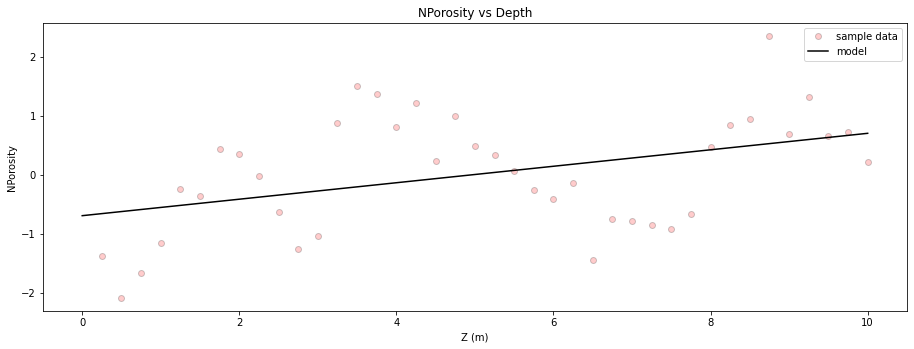

In [7]:
depth_values = np.linspace(0.0,10.0,100)
plt.subplot(111)
plt.plot(depth, Npor, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.plot(depth_values, intercept + slope*depth_values, label='model', color = 'black')
plt.title('NPorosity vs Depth')
plt.xlabel('Z (m)')
plt.ylabel('NPorosity')
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

#### Comparison to a Non Parametric Model

Let's run a quick decision tree for a comparision to a non parametric model.

* we gain significant flexibility to fit any patterns from the data

* requires more inference as nonparametric is actually parameter rich!

This first model is a decision tree regression model.

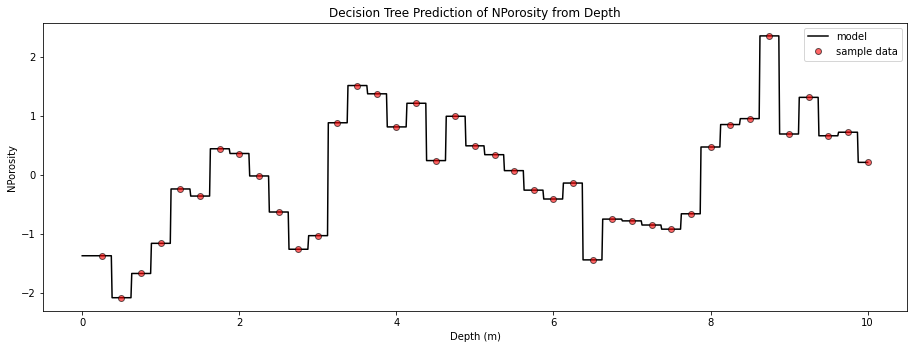

In [8]:
from sklearn import tree                                    # tree program from scikit learn (packag
depth_values = np.linspace(0.0,10.0,1000)
my_tree = tree.DecisionTreeRegressor(min_samples_leaf=1, max_depth = 20)
my_tree = my_tree.fit(depth.values.reshape(-1, 1), Npor)
DT_Npor = my_tree.predict(depth_values.reshape(-1,1))
plt.subplot(111)
plt.plot(depth_values, DT_Npor, label='model', color = 'black')
plt.plot(depth, Npor, 'o', label='sample data', color = 'red', alpha = 0.6, markeredgecolor = 'black')
plt.title('Decision Tree Prediction of NPorosity from Depth')
plt.xlabel('Depth (m)')
plt.ylabel('NPorosity')
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

and here is a random forest model:

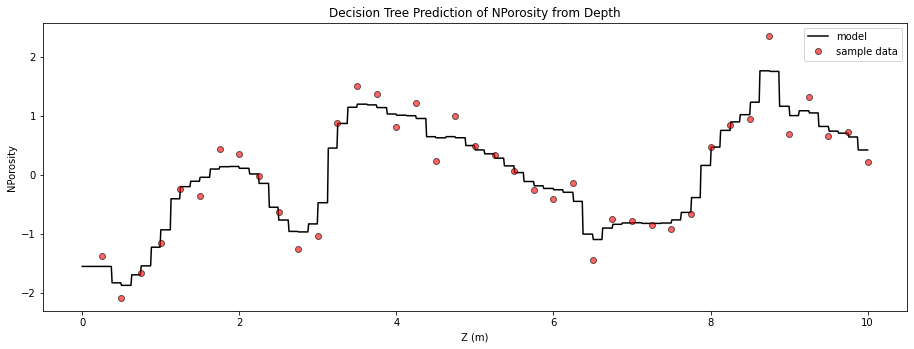

In [9]:
from sklearn.ensemble import RandomForestRegressor          # random forest method
seed = 73093                                                # set the random forest hyperparameters
max_depth = 5
num_tree = 1000
max_features = 1

my_forest = RandomForestRegressor(max_depth=max_depth, random_state=seed,n_estimators=num_tree, max_features=max_features)
my_forest.fit(X = depth.values.reshape(-1, 1), y = Npor)  
RF_Npor = my_forest.predict(depth_values.reshape(-1,1))
plt.subplot(111)
plt.plot(depth_values, RF_Npor, label='model', color = 'black')
plt.plot(depth, Npor, 'o', label='sample data', color = 'red', alpha = 0.6, markeredgecolor = 'black')
plt.title('Decision Tree Prediction of NPorosity from Depth')
plt.xlabel('Z (m)')
plt.ylabel('NPorosity')
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

#### Standardized Features

Let's work with standardized features. I switched to Gaussian transform (see below).

In [10]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()                                  # instantiate the scaler 
# sfeatures = scaler.fit_transform(df.values)                # standardize all the values extracted from the DataFrame 
# df_st = pd.DataFrame()                                     # instantiate a new DataFrame
# df_st = pd.DataFrame(sfeatures, index=df.index, columns=df.columns) # copy the standardized values into the new DataFrame
# depth_st = df_st['Depth']
# Npor_st = df_st['Nporosity']
# df_st.head()                                               # preview the the new DataFrame

#### Gaussian Anamorphosis

Let's transform the features to standard normal. 

* Gaussian distribution
* mean of 0.0
* standard deviation of 1.0

The porosity feature was 'transformed' to Gaussian previously, but there is an opportunity to clean it up.

* compare the original and transformed below


In [11]:
from sklearn.preprocessing import QuantileTransformer
import geostatspy.geostats as geostats

# I would like to use the scikit-learn method, but it creates outliers!
#nscore = QuantileTransformer(n_quantiles=40, random_state=73, output_distribution = 'normal') 
#nsfeatures = nscore.fit_transform(df)                                                             # standardize all the values extracted from the DataFrame 
#df_ns = pd.DataFrame()                                      # instantiate a new DataFrame
#df_ns = pd.DataFrame(nsfeatures, index=df.index, columns=df.columns) # copy the standardized values into the new DataFrame

#Transform to Gaussian with GeostatsPy
df_ns = pd.DataFrame()   
df_ns['Nporosity'], tvPor, tnsPor = geostats.nscore(df, 'Nporosity') # nscore transform for all facies porosity 
df_ns['Depth'], tvdepth, tnsdepth = geostats.nscore(df, 'Depth')  # nscore transform for all facies permeability
depth_ns = df_ns['Depth']
Npor_ns = df_ns['Nporosity']
df_ns.head() 

,Nporosity,Depth
0,-1.356312,-2.026808
1,-2.219599,-1.780464
2,-1.780464,-1.534121
3,-1.091620,-1.356312
4,-0.221119,-1.213340


Let's make some good cumulative distribution function plots to check the original and transformed variables.

* the results look very good

We are doing this because we will need a Gaussian distribution for the predictor feature for orthogonality.  More later!

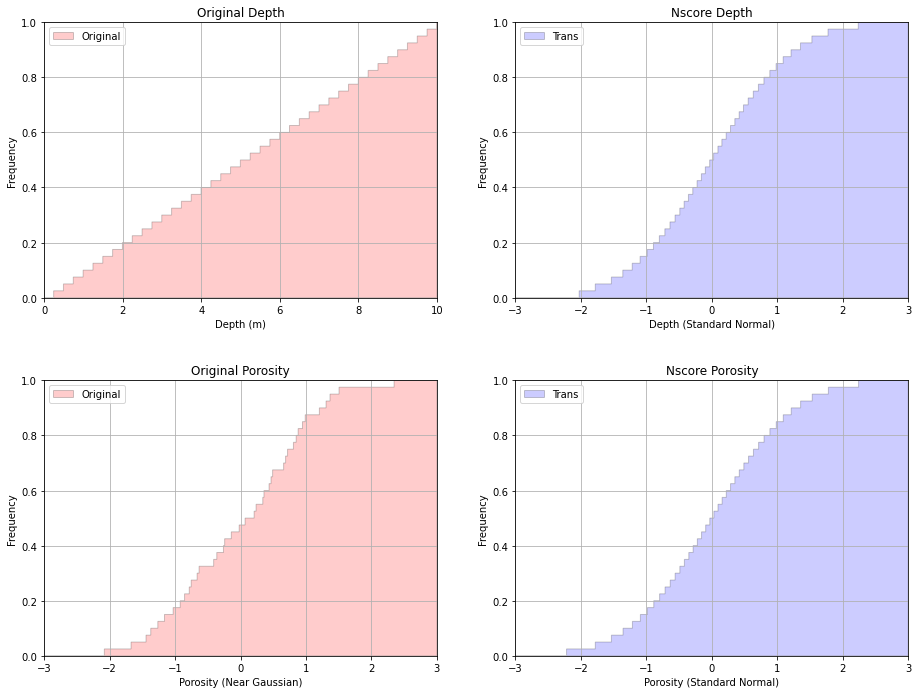

In [12]:
plt.subplot(221)                                              # plot original sand and shale porosity histograms
plt.hist(df['Depth'], facecolor='red',bins=np.linspace(0.0,10.0,1000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label='Original')
plt.xlim([0.0,10.0]); plt.ylim([0,1.0])
plt.xlabel('Depth (m)'); plt.ylabel('Frequency'); plt.title('Original Depth')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(222)  
plt.hist(df_ns['Depth'], facecolor='blue',bins=np.linspace(-3.0,3.0,1000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label = 'Trans')
plt.xlim([-3.0,3.0]); plt.ylim([0,1.0])
plt.xlabel('Depth (Standard Normal)'); plt.ylabel('Frequency'); plt.title('Nscore Depth')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(223)                                        # plot nscore transformed sand and shale histograms
plt.hist(df['Nporosity'], facecolor='red',bins=np.linspace(-3.0,3.0,1000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label='Original')
plt.xlim([-3.0,3.0]); plt.ylim([0,1.0])
plt.xlabel('Porosity (Near Gaussian)'); plt.ylabel('Frequency'); plt.title('Original Porosity')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(224)                                        # plot nscore transformed sand and shale histograms
plt.hist(df_ns['Nporosity'], facecolor='blue',bins=np.linspace(-3.0,3.0,100000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label = 'Trans')
plt.xlim([-3.0,3.0]); plt.ylim([0,1.0])
plt.xlabel('Porosity (Standard Normal)'); plt.ylabel('Frequency'); plt.title('Nscore Porosity')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.3)
plt.show()

#### Linear Regression Model with Standardized Features

Let's repeat the linear regression model, now with the standardized features.

In [13]:
lin_ns = LinearRegression() 
lin_ns.fit(depth_ns.values.reshape(-1, 1), Npor_ns) 
slope_ns = lin_ns.coef_[0]
intercept_ns = lin_ns.intercept_

Now visualize the model. 

* Quite a poor fit

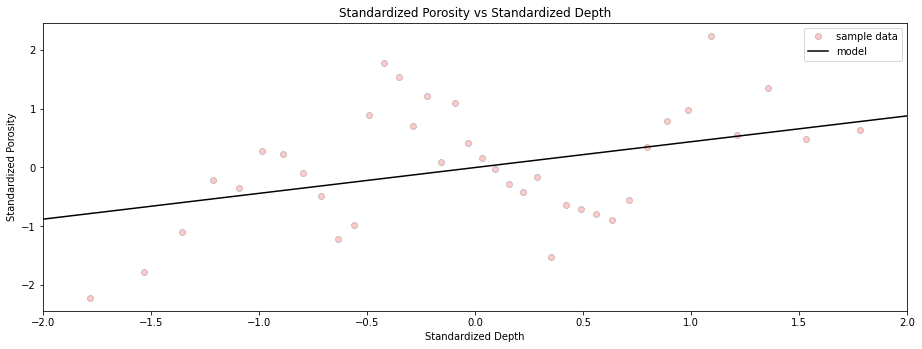

In [14]:
depth_ns_values = np.linspace(-3.0,3.0,100)
plt.subplot(111)
plt.plot(depth_ns, Npor_ns, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.plot(depth_ns_values, intercept_ns + slope_ns*depth_ns_values, label='model', color = 'black')
plt.title('Standardized Porosity vs Standardized Depth')
plt.xlabel('Standardized Depth')
plt.ylabel('Standardized Porosity')
plt.legend(); plt.xlim(-2,2)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

#### Polynomial Regression 

We will do polynomial regression by hand:

* create the polynomial basis expansion of the original predictor feature

* perform linear regression on the polynomial basis expansion

In [15]:
poly4 = PolynomialFeatures(degree = 4)                       # instantiate polynomial expansion 
depth_ns_poly4 = poly4.fit_transform(depth_ns.values.reshape(-1, 1))# apply polynomial expansion to transformed predictor feature
df_depth_ns_poly4 = pd.DataFrame({'Values':depth_ns.values,'0th': depth_ns_poly4[:,0],'1st': depth_ns_poly4[:,1],'2nd': depth_ns_poly4[:,2], '3rd': depth_ns_poly4[:,3], '4th': depth_ns_poly4[:,4]}) # make a new DataFrame from the vectors
df_depth_ns_poly4.head()

,Values,0th,1st,2nd,3rd,4th
0,-2.026808,1.0,-2.026808,4.107951,-8.326029,16.875264
1,-1.780464,1.0,-1.780464,3.170053,-5.644167,10.049238
2,-1.534121,1.0,-1.534121,2.353526,-3.610592,5.539084
3,-1.356312,1.0,-1.356312,1.839582,-2.495046,3.384060
4,-1.213340,1.0,-1.213340,1.472193,-1.786270,2.167352


Now let's check the correlation between the polynomial basis expansion of the original predictor features data.

In [16]:
df_depth_ns_poly4.iloc[:,2:].corr()

,1st,2nd,3rd,4th
1st,1.000000,0.059005,0.850982,0.111841
2nd,0.059005,1.000000,0.147450,0.938188
3rd,0.850982,0.147450,1.000000,0.243912
4th,0.111841,0.938188,0.243912,1.000000


#### Visualize the Polynomial Expansion Features' Pairwise Relationship

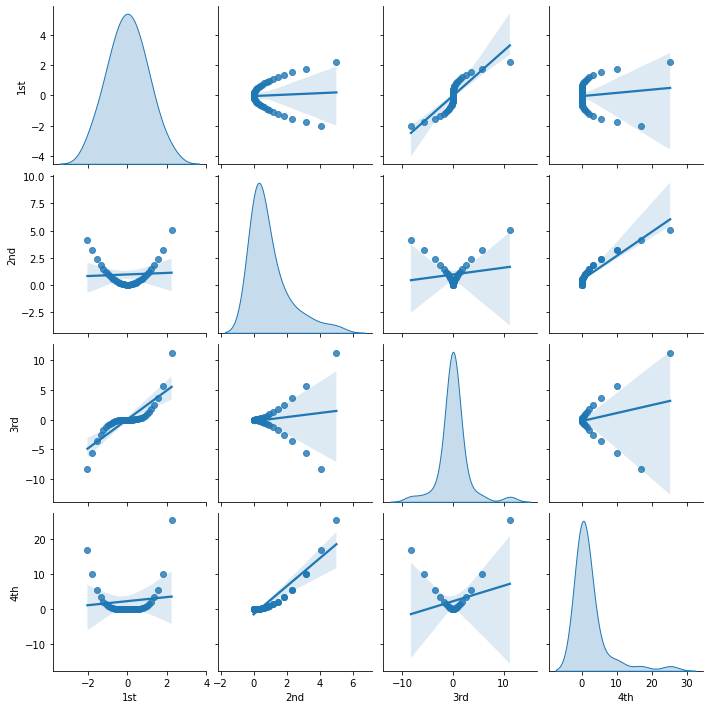

In [17]:
sns.pairplot(df_depth_ns_poly4.iloc[:,2:],vars=['1st','2nd','3rd','4th'],markers='o', kind='reg',diag_kind='kde')

Let's visualize the polynomial expansion over the standardized depth.

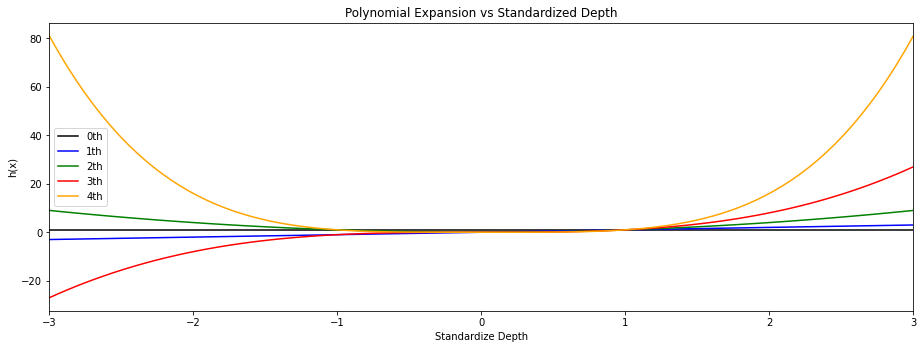

In [18]:
plt.subplot(111)
plt.plot(depth_ns_values, poly4.fit_transform(depth_ns_values.reshape(-1, 1)) [:,0], label='0th', color = 'black')
plt.plot(depth_ns_values, poly4.fit_transform(depth_ns_values.reshape(-1, 1)) [:,1], label='1th', color = 'blue')
plt.plot(depth_ns_values, poly4.fit_transform(depth_ns_values.reshape(-1, 1)) [:,2], label='2th', color = 'green')
plt.plot(depth_ns_values, poly4.fit_transform(depth_ns_values.reshape(-1, 1)) [:,3], label='3th', color = 'red')
plt.plot(depth_ns_values, poly4.fit_transform(depth_ns_values.reshape(-1, 1)) [:,4], label='4th', color = 'orange') 
plt.title('Polynomial Expansion vs Standardized Depth')
plt.xlabel('Standardize Depth')
plt.ylabel('h(x)')
plt.legend(); plt.xlim(-3,3)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

We can also check the arithmetic average of each polynomial basis expansion.

In [19]:
print('The averages of each basis expansion, 0 - 4th order = ' + str(stats.describe(depth_ns_poly4)[2]) + '.')

The averages of each basis expansion, 0 - 4th order = [1.         0.00536486 0.9458762  0.07336308 2.31077802].


Let's fit the linear regression model to the polynomial basis expansion.

* note the model is quite flexible to fit this complicated / nonlinear data

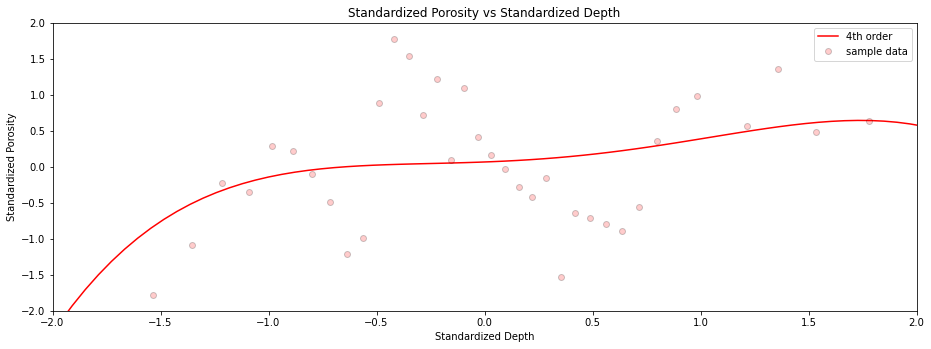

In [20]:
lin_poly4 = LinearRegression()                       # instantiate new linear model 
lin_poly4.fit(df_depth_ns_poly4.iloc[:,1:], Npor_ns)   # train linear model with polynomial expansion, polynomial regression
plt.subplot(111)
plt.plot(depth_ns_values, lin_poly4.predict(poly4.fit_transform(depth_ns_values.reshape(-1, 1))), label='4th order',color = 'red') 
plt.plot(depth_ns, Npor_ns, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.title('Standardized Porosity vs Standardized Depth')
plt.xlabel('Standardized Depth')
plt.ylabel('Standardized Porosity')
plt.xlim(-2,2); plt.ylim(-2,2)
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

In [21]:
lin_poly4.coef_

array([ 0.        ,  0.112467  ,  0.1521794 ,  0.15226789, -0.09614024])

#### Regression with Hermite Basis Expansion

We can use Hermite polynomials to reduce the correlation between the basis predictor features.

* We transformed the predicctor feature, depth, to standard normal since the Hermite poly nomials approach independence over the range of negative infinity to positive infinity under the assumption of standard normal probability density function. 

In [22]:
orders4 = [0,1,2,6,7]
depth_ns_hermite4 = scipy.special.eval_hermitenorm(orders4, depth_ns.values.reshape(-1, 1), out=None) 
df_depth_ns_hermite4 = pd.DataFrame({'value':depth_ns.values,'0th': depth_ns_hermite4[:,0],'1st': depth_ns_hermite4[:,1],'2nd': depth_ns_hermite4[:,2], '5th': depth_ns_hermite4[:,3], '6th': depth_ns_hermite4[:,4]}) # make a new DataFrame from the vectors
df_depth_ns_hermite4.head()

,value,0th,1st,2nd,5th,6th
0,-2.026808,1.0,-2.026808,3.107951,-13.948388,-83.660777
1,-1.780464,1.0,-1.780464,2.170053,8.770449,-86.669836
2,-1.534121,1.0,-1.534121,1.353526,20.858781,-59.578844
3,-1.356312,1.0,-1.356312,0.839582,23.245520,-31.623835
4,-1.213340,1.0,-1.213340,0.472193,21.929162,-8.804757


Note: I have omitted orders that had a higher degree of correlation for our dataset.

Let's check the correlation between the Hermite predictor features. There is improvement.

In [23]:
df_depth_ns_hermite4.iloc[:,2:].corr()

,1st,2nd,5th,6th
1st,1.000000,0.059005,-0.109804,0.269326
2nd,0.059005,1.000000,0.157525,-0.047799
5th,-0.109804,0.157525,1.000000,-0.024585
6th,0.269326,-0.047799,-0.024585,1.000000


The pairwise linear correlation is quite low compared to the polynomial basis.

Let's visualize the bivariate relationships between our Hermite basis orders. 

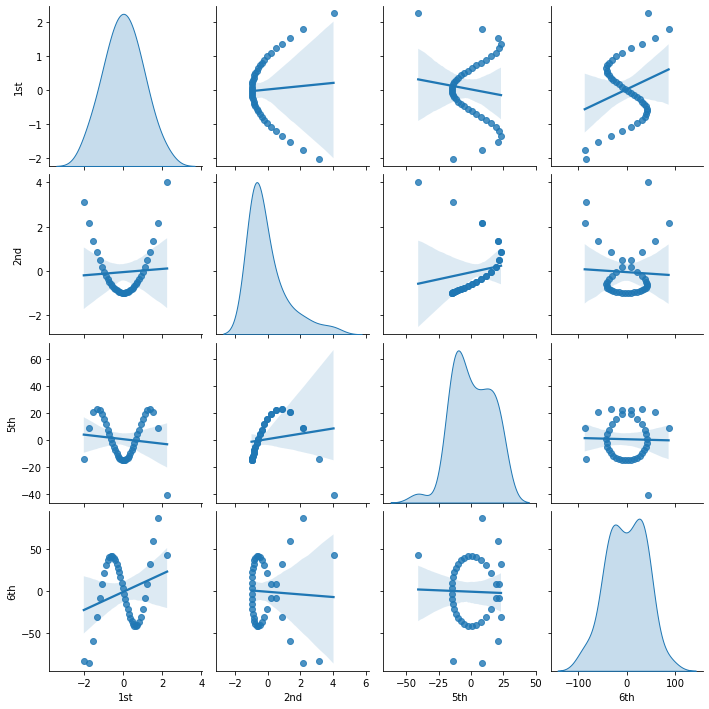

In [24]:
sns.pairplot(df_depth_ns_hermite4.iloc[:,2:],vars=['1st','2nd','5th','6th'],markers='o', kind='reg',diag_kind='kde')

We can check the arithmetic averages of all the hermite basis expansions.

In [25]:
print('The means of each basis expansion, 0 - 4th order = ' + str(stats.describe(depth_ns_hermite4)[2]) + '.')

The means of each basis expansion, 0 - 4th order = [ 1.          0.00536486 -0.0541238   0.70118267 -1.01116309].


Let's visualize Hermite polynomials over the range of the standardized depth.

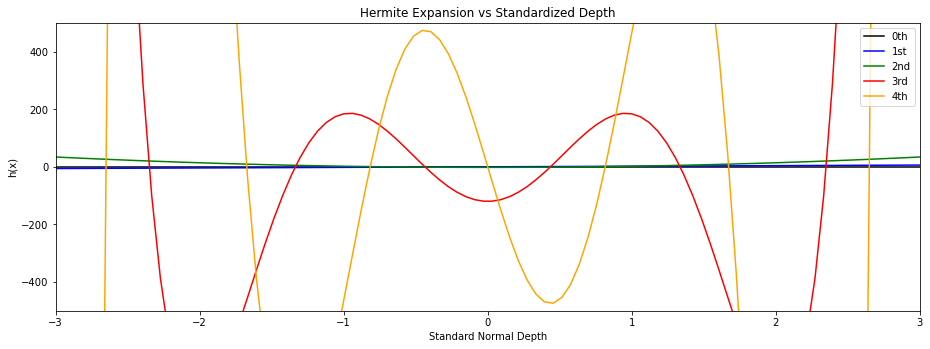

In [26]:
plt.subplot(111)
plt.plot(depth_ns_values, scipy.special.eval_hermite(orders4, depth_ns_values.reshape(-1, 1)) [:,0], label='0th', color = 'black')
plt.plot(depth_ns_values, scipy.special.eval_hermite(orders4, depth_ns_values.reshape(-1, 1)) [:,1], label='1st', color = 'blue')
plt.plot(depth_ns_values, scipy.special.eval_hermite(orders4, depth_ns_values.reshape(-1, 1)) [:,2], label='2nd', color = 'green')
plt.plot(depth_ns_values, scipy.special.eval_hermite(orders4, depth_ns_values.reshape(-1, 1)) [:,3], label='3rd', color = 'red')
plt.plot(depth_ns_values, scipy.special.eval_hermite(orders4, depth_ns_values.reshape(-1, 1)) [:,4], label='4th', color = 'orange')
plt.title('Hermite Expansion vs Standardized Depth')
plt.xlabel('Standard Normal Depth')
plt.ylabel('h(x)')
plt.legend(); plt.ylim(-500,500); plt.xlim(-3,3)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

Now let's fit our Hermite basis regression model.

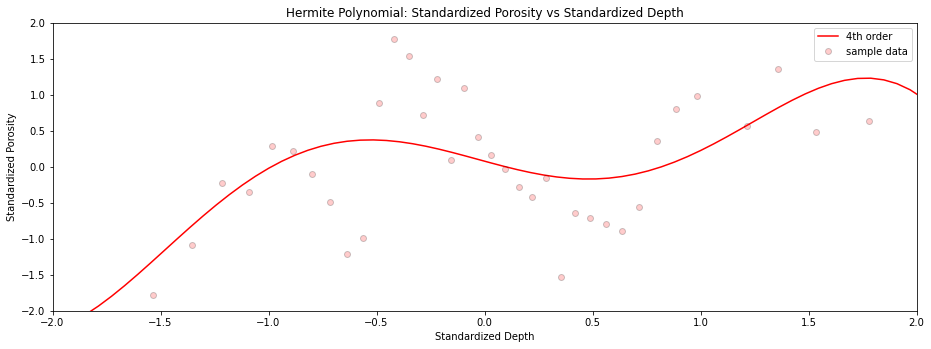

In [27]:
lin_herm4 = LinearRegression() 
lin_herm4.fit(df_depth_ns_hermite4.iloc[:,1:], Npor_ns) 
plt.subplot(111)
plt.plot(depth_ns_values, lin_herm4.predict(scipy.special.eval_hermitenorm(orders4, depth_ns_values.reshape(-1, 1), out=None)), label='4th order',color = 'red') 
plt.plot(depth_ns, Npor_ns, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.title('Hermite Polynomial: Standardized Porosity vs Standardized Depth')
plt.xlabel('Standardized Depth')
plt.ylabel('Standardized Porosity')
plt.xlim(-2,2); plt.ylim(-2,2)
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

Since we have less correlation between the expanded basis features we can check out the model coefficients and interpret the unique importance of each order.

In [28]:
lin_herm4.coef_

array([ 0.        ,  0.34510167, -0.18326825,  0.00670818,  0.01108356])

#### Orthogonal Polynomials

Let's try the orthogonal polygons reimplimented in Python by Dave Moore from the poly() function in R.

* the functions below for fit and predict are directly from Dave's [blog](http://davmre.github.io/blog/python/2013/12/15/orthogonal_poly)

* note during the fit to the training data the norm2 and alpha model parameters are cacluated
* these parameters must be passed to each subsequent predict to ensure the results are consistent

In [29]:
import numpy as np  

# functions taken (without modification) from http://davmre.github.io/blog/python/2013/12/15/orthogonal_poly
# appreciation to Dave Moore for the great blog post on titled 'Orthogonal polynomial regression in Python'
# functions are Dave's reimplimentation of poly() from R

def ortho_poly_fit(x, degree = 1):
    n = degree + 1
    x = np.asarray(x).flatten()
    if(degree >= len(np.unique(x))):
            stop("'degree' must be less than number of unique points")
    xbar = np.mean(x)
    x = x - xbar
    X = np.fliplr(np.vander(x, n))
    q,r = np.linalg.qr(X)

    z = np.diag(np.diag(r))
    raw = np.dot(q, z)

    norm2 = np.sum(raw**2, axis=0)
    alpha = (np.sum((raw**2)*np.reshape(x,(-1,1)), axis=0)/norm2 + xbar)[:degree]
    Z = raw / np.sqrt(norm2)
    return Z, norm2, alpha

def ortho_poly_predict(x, alpha, norm2, degree = 1):
    x = np.asarray(x).flatten()
    n = degree + 1
    Z = np.empty((len(x), n))
    Z[:,0] = 1
    if degree > 0:
        Z[:, 1] = x - alpha[0]
    if degree > 1:
      for i in np.arange(1,degree):
          Z[:, i+1] = (x - alpha[i]) * Z[:, i] - (norm2[i] / norm2[i-1]) * Z[:, i-1]
    Z /= np.sqrt(norm2)
    return Z

Let's give it a try and perform orthogonal polynomial expansion of our standard normal transformed depth

In [30]:
depth_ns_ortho4, norm2, alpha = ortho_poly_fit(depth_ns.values.reshape(-1, 1), degree = 4)
df_depth_ns_ortho4 = pd.DataFrame({'value':depth_ns.values,'0th': depth_ns_ortho4[:,0],'1st': depth_ns_ortho4[:,1],'2nd': depth_ns_ortho4[:,2], '3rd': depth_ns_ortho4[:,3], '4th': depth_ns_ortho4[:,4]}) # make a new DataFrame from the vectors
df_depth_ns_ortho4.head()

,value,0th,1st,2nd,3rd,4th
0,-2.026808,0.158114,-0.330385,0.440404,-0.460160,0.420374
1,-1.780464,0.158114,-0.290335,0.313201,-0.207862,0.021278
2,-1.534121,0.158114,-0.250285,0.202153,-0.029761,-0.172968
3,-1.356312,0.158114,-0.221377,0.132038,0.058235,-0.220834
4,-1.213340,0.158114,-0.198133,0.081765,0.107183,-0.219084


Let's check the correlation between the orthogonal polynomial predictor features. I'm impressed! The between basis feature order correlations are all zero!

In [31]:
df_depth_ns_ortho4.iloc[:,2:].corr()

,1st,2nd,3rd,4th
1st,1.000000e+00,-1.387779e-16,2.775558e-17,-2.775558e-17
2nd,-1.387779e-16,1.000000e+00,5.551115e-17,-2.775558e-17
3rd,2.775558e-17,5.551115e-17,1.000000e+00,2.498002e-16
4th,-2.775558e-17,-2.775558e-17,2.498002e-16,1.000000e+00


Let's visualize the bivariate relationships between our orthogonal polynomial basis orders. 

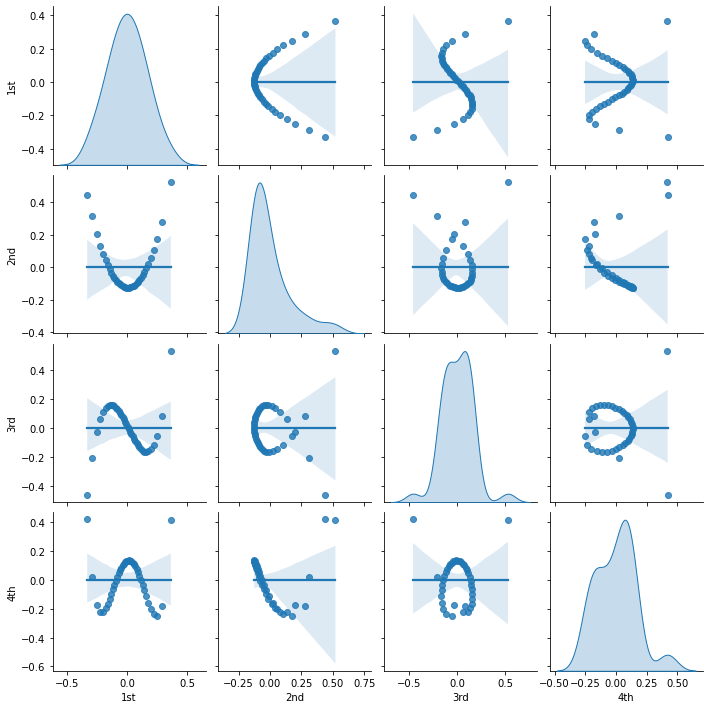

In [32]:
sns.pairplot(df_depth_ns_ortho4.iloc[:,2:],vars=['1st','2nd','3rd','4th'],markers='o', kind='reg',diag_kind='kde')

Let's visualize orthogonal polynomial basis orders over the range of the standardized depth.

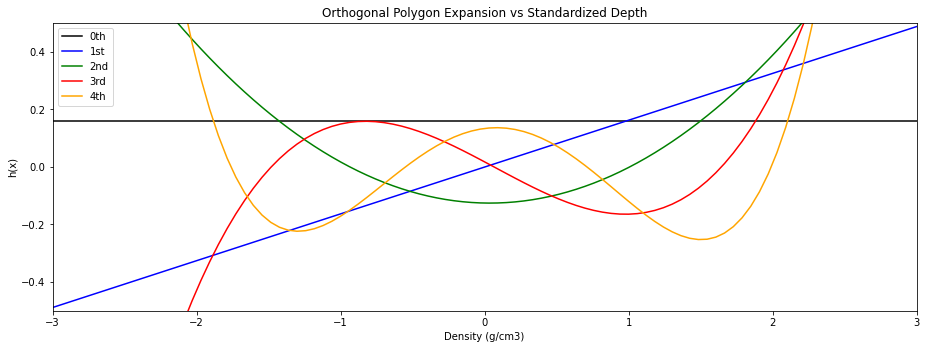

In [33]:
ortho_poly_ns_values = ortho_poly_predict(depth_ns_values.reshape(-1, 1), alpha, norm2, degree = 4)

plt.subplot(111)
plt.plot(depth_ns_values, ortho_poly_ns_values[:,0], label='0th', color = 'black')
plt.plot(depth_ns_values, ortho_poly_ns_values[:,1], label='1st', color = 'blue')
plt.plot(depth_ns_values, ortho_poly_ns_values[:,2], label='2nd', color = 'green')
plt.plot(depth_ns_values, ortho_poly_ns_values[:,3], label='3rd', color = 'red')
plt.plot(depth_ns_values, ortho_poly_ns_values[:,4], label='4th', color = 'orange')
plt.title('Orthogonal Polygon Expansion vs Standardized Depth')
plt.xlabel('Density (g/cm3)')
plt.ylabel('h(x)')
plt.legend(); plt.ylim(-.5,.5); plt.xlim(-3,3)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

Finally let's fit our orthogonal polynomial basis expansion regression model.

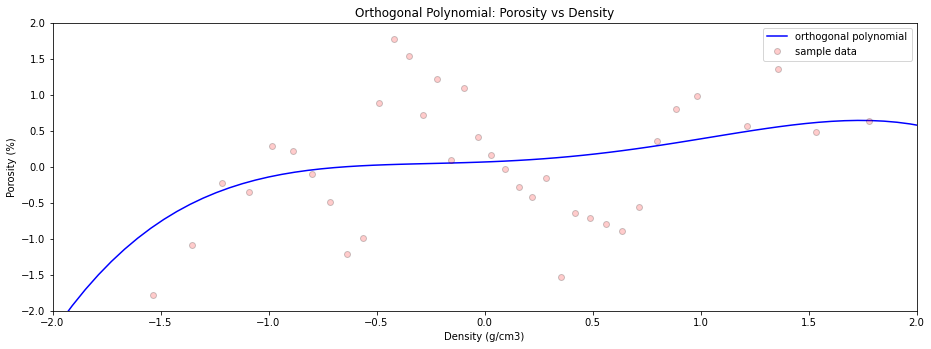

In [34]:
lin_ortho4 = LinearRegression() 
lin_ortho4.fit(df_depth_ns_ortho4.iloc[:,1:], Npor_ns) 
plt.subplot(111)

plt.plot(depth_ns_values, lin_ortho4.predict(ortho_poly_ns_values), color = 'blue', label = 'orthogonal polynomial') 
plt.plot(depth_ns, Npor_ns, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.title('Orthogonal Polynomial: Porosity vs Density')
plt.xlabel('Density (g/cm3)')
plt.ylabel('Porosity (%)')
plt.xlim(-2,2); plt.ylim(-2,2)
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

Let's check out the model parameters for our independent orthogonal basis predictor features.

In [35]:
lin_ortho4.coef_

array([-6.73500338e-17,  2.70524700e+00, -1.44747655e+00,  1.04486290e+00,
       -9.86003333e-01])

#### Polynomial Regression in scikit-learn with Pipelines

The need to first perform basis expansion and then train the resulting (after basis transformations) linear model may seem a bit complicated.

* one solution is to use the Pipeline object from scikit-learn. 

Here's some highlights on Pipelines.

###  Machine Learning Modeling Pipelines

Machine learning workflows can be complicated, with various steps:

* data preparation, feature engineering transformations

* model parameter fitting

* model hyperparameter tuning

* modeling method selection

* searching over a large combinatorial of hyperparameters

* training and testing model runs

Pipelines are a scikit-learn class that allows for the encapsilation of a seuqence of data preparation and modeling steps

* then we can treat the pipeline as an object in our much condensed workflow

The pipeline class allows us to:

* improve code readability and to keep everything straight

* avoid common workflow problems like data leakage, testing data informing model parameter training 

* abstract common machine learning modeling and focus on building the best model possible

The fundamental philosophy is to treat machine learning as a combinatorial search to find the best model (AutoML)

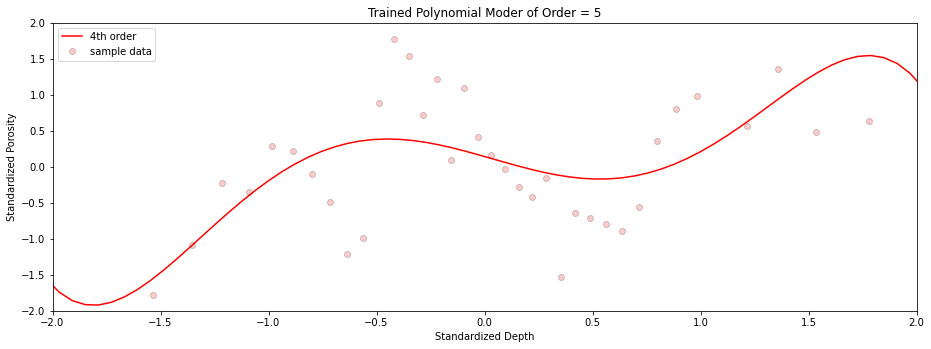

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

order=5                                                 # set the polynomial order

polyreg=make_pipeline(PolynomialFeatures(order),LinearRegression()) # make the modeling pipeline
polyreg.fit(depth_ns.values.reshape(-1, 1), Npor_ns)    # fit the model to the data
Npor_hat = polyreg.predict(depth_ns_values.reshape(-1, 1)) # predict with the modeling pipeline

plt.subplot(111)
plt.plot(depth_ns_values,Npor_hat, label='4th order',color = 'red') 
plt.plot(depth_ns, Npor_ns, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.title('Trained Polynomial Moder of Order = ' + str(order))
plt.xlabel('Standardized Depth')
plt.ylabel('Standardized Porosity')
plt.xlim(-2,2); plt.ylim(-2,2)
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

#### Comments

Polynomial regression is a flexible method for modeling nonlinear data and it introduces the concept of basis expansion. 

* We could have done more to explore the advantages of orthogonal basis vs. nonorthogonal basis. 

I hope this was helpful,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
On twitter I'm the @GeostatsGuy.


***

#### More on Michael Pyrcz and the Texas Center for Geostatistics:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
